In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math

Расчет "руками" по формулам для понимания работы метода

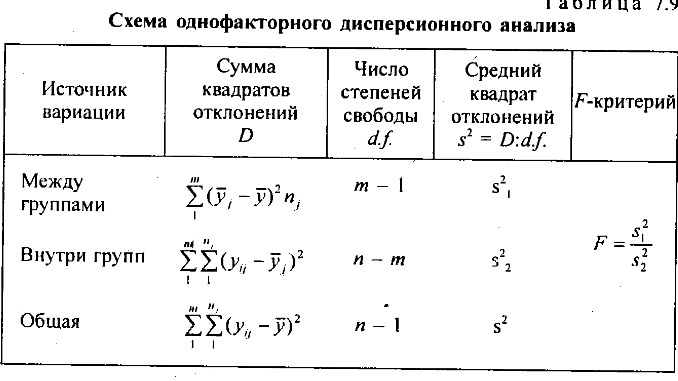
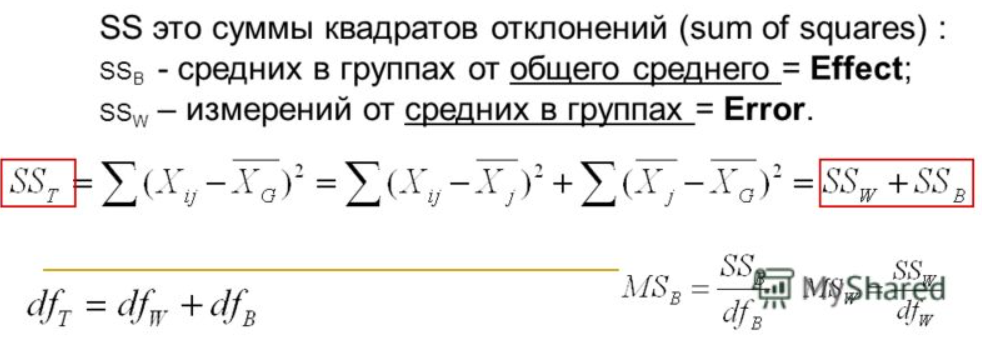

+ H0 (нулевая гипотеза): µ 1 = µ 2 = µ 3 = … = µ k (все средние значения совокупности равны)
+ H1 (обратная гипотеза): по крайней мере одно среднее значение популяции отличаетсяот остальных

In [2]:
# Исходные наблюдения - отдельные группы и одна переменная где все вместе
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
groups = group1+group2+group3


In [3]:
# Для расчетов - суммарное значение всех элементов в выборках
sum1 = sum(group1)
sum2 = sum(group2)
sum3 = sum(group3)
sum_all = sum(groups)
# Общее число наблюдений, m - число групп и число наблюдений в каждой группе
N = len(groups)
m = 3
n1 = len(group1)
n2 = len(group2)
n3 = len(group3)

In [4]:
# Общая средняя и средняя для каждой группы
avr1 = sum1/n1
avr2 = sum2/n2
avr3 = sum3/n3
avr = sum_all/N

In [5]:
# Число степеней свободы
ddf = N - 1
ddfw = N - m
ddfb = m - 1

In [6]:
# Рассчитываем сумму квадратов
# Общая сумма квадратов
SST = 0
for i in groups:
    s = (i - avr)**2
    SST += s
# Внутригрупповая сумма квадратов
SSB = 0
for i in [avr1, avr2, avr3]:
    s = n1*((i-avr)**2)
    SSB += s
# Межгруповая сумма квадратов
SSW = 0 
for i in group1:
    s = (i - avr1)**2
    SSW += s 
for i in group2:
    s = (i - avr2)**2
    SSW += s 
for i in group3:
    s = (i - avr3)**2
    SSW += s 

In [7]:
# Делим на соответствующее число свободы
ST = SST/ddf
SB = SSB/ddfb
SW = SSW/ddfw

In [8]:
# Наблюдаемое значение критерия
F = SB/SW
# Критическое значение
Fk = st.f.ppf(1-0.05, ddfb, ddfw)
if F > Fk:
    print(f'{F} больше {Fk} следовательно отвергаем нулевую гипотезу')
if F < Fk:
    print(f'{F} меньше {Fk} следовательно принимаем нулевую гипотезу - фактор не значим')

2.357532255133558 меньше 3.3541308285291986 следовательно принимаем нулевую гипотезу - фактор не значим


In [9]:
# Сверим с реализацией
st.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)